In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

In [5]:
PATH = 'data/iMaterialist/'
sz=224

In [6]:
ls {PATH}

labels.csv                 test.json               train.json
labels.gz                  test.json.zip           train.json.zip
sample_submission.csv      train_10k/              valid/
sample_submission.csv.zip  train_10kv2/            validation.json
test/                      train_10kv2_labels.csv  validation.json.zip


In [7]:
def get_1st(path): return glob(f'{path}/*.*')[0]

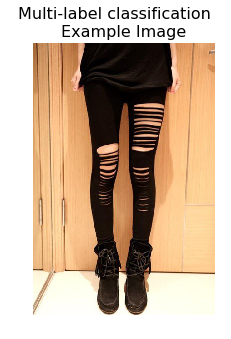

In [9]:
fn = get_1st(f'{PATH}train_10kv2')
plots_from_files([fn], titles=['Example Image'], maintitle="Multi-label classification")

In [10]:
from fastai.metrics import f1
metrics = [f1]
f_model = resnet34

In [17]:
tfms = tfms_from_model(f_model, sz)
val_idxs = get_cv_idxs(10000)
data = ImageClassifierData.from_csv(PATH, 'train_10kv2', f'{PATH}train_10kv2_labels.csv', tfms=tfms, val_idxs=val_idxs, suffix='.jpg')

In [27]:
learn = ConvLearner.pretrained(f_model, data, precompute=True, metrics=[f1])

In [28]:
learn.lr_find(start_lr=1e-3, end_lr=1e3)

epoch      trn_loss   val_loss   f1         
    0      0.489565   0.765733   0.24528   



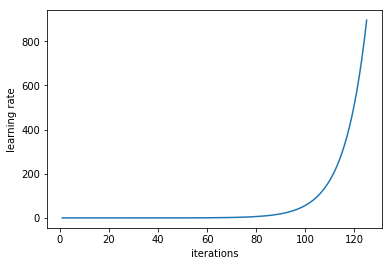

In [29]:
learn.sched.plot_lr()

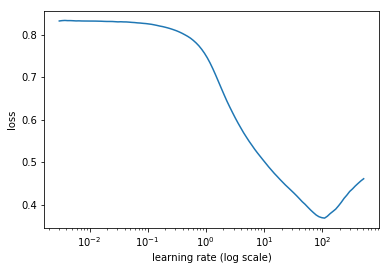

In [30]:
learn.sched.plot()

In [31]:
learn.fit(10, 10)

epoch      trn_loss   val_loss   f1         
    0      0.089328   0.071939   0.369202  
    1      0.073441   0.069826   0.383523  
    2      0.07048    0.068479   0.392878  
    3      0.069058   0.068113   0.389006  
    4      0.067728   0.067927   0.388196  
    5      0.0673     0.067148   0.408661  
    6      0.066082   0.067338   0.418814  
    7      0.06487    0.067172   0.397087  
    8      0.064512   0.067492   0.39378   
    9      0.063732   0.067264   0.413313  



[array([0.06726]), 0.41331288290796503]